## Unsupervised learning subsumes all kinds of machine learning where there is no known output, no teacher to instruct the learning algorithm.

### In unsupervised learning, the learning algorithm is just shown the input data, and asked to extract knowledge from this data.

# Types of unsupervised learning

 ### In this chapter: transformations of the dataset, and clustering.
 
 
  - Unsupervised transformations of a dataset are algorithms that create a new representation of the data which might be easier for humans or other machine learning algorithms to understand.
  
  
  - A common application of unsupervised transformations is dimensionality reduction, which takes a high-dimensional representation of the data, consisting of many features, and finding a new way to represent this data that summarizes the essential characteristics about the data with fewer features.
  
  
   - Another application for unsupervised transformations is finding the parts or components that “make up” the data. An example of this is topic extraction on collections of text documents.

 - Clustering algorithms on the other hand partition data into distinct groups of similar items.
 
 # Challenges in unsupervised learning
 
 - A major challenge in unsupervised learning is evaluating whether the algorithm learned something useful.
 
 
 - Unsupervised learning algorithms are usually applied to data that does not contain any label information, so we don’t know what the right output should be.
 
 - Therefore it is very hard to say whether a model “did well”.
 
 - Often the only way to evaluate the result of an unsupervised algorithm is to inspect it manually.
 
  - As a consequence, unsupervised algorithms are used often in an exploratory setting, when a data scientist wants to understand the data better, rather than as part of a larger automatic system
  
  - Before we start with “real” unsupervised algorithms, we will briefly discuss some simple preprocessing methods that often come in handy.

# Preprocessing and Scaling

 - In the last chapter we saw that some algorithms, like neural networks and SVMs, are very sensitive to the scaling of the data.

In [1]:
import mglearn
mglearn.plots.plot_scaling()

# Different kinds of preprocessing

 - The first plot shows a synthetic two-class classification dataset with two features 
 
 - The StandardScaler in scikit-learn ensures that for each feature, the mean is zero, and the variance is one, bringing all features to the same magnitude. 
 
 - However, this scaling does not ensure any particular minimum and maximum values for the features

 - The RobustScaler works similarly to the StandardScaler in that it ensures statistical properties for each feature that guarantee that they are on the same scale.
 
 - However, the RobustScaler uses the median and quartiles
 
 ### http://blog.naver.com/PostView.nhn?blogId=istech7&logNo=50152009300
 
 
 - This makes the RobustScaler ignore data points that are very different from the rest (like measurement errors). These odd data points are also called outliers, and might often lead to trouble for other scaling techniques.
  
  
 - The MinMaxScaler on the other hand shifts the data such that all features are exactly between 0 and 1.
  
 - Finally, the Normalizer does a very different kind of rescaling.
 
 - It scales each data point such that the feature vector has a euclidean length of one.
 
 - This normalization is often used when only the direction (or angle) of the data matters, not the length of the feature vector.

# Applying data transformations

 - As an example, say we want to apply the kernel SVM (SVC) to the cancer dataset, and use MinMaxScaler for preprocessing the data

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [4]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [5]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [6]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


## Maybe somewhat surprisingly, you can see that for the test set, after scaling, the minimum and maximum are not zero and one. Some of the features are even outside the 0-1 range!


### The explanation is that the MinMaxScaler (and all the other scalers) always applies exactly the same transformation to the training and the test set.

# Scaling training and test data the same way

 - It is important that exactly the same transformation is applied to the training set and the test set for the supervised model to make sense on the test set.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

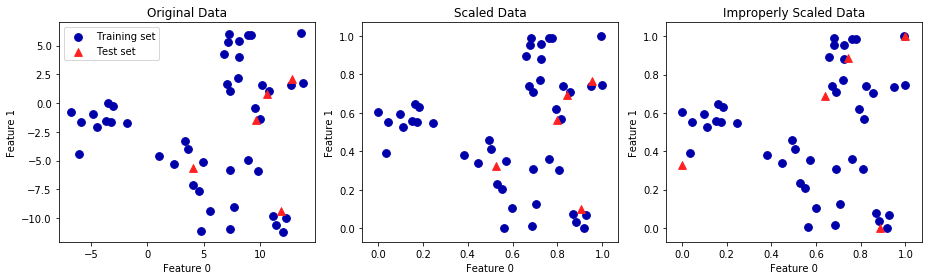

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

 - The second figure is the same data, but scaled using the MinMaxScaler. Here, we called fit on the training set, and then transform on the training and the test set.
 
 - You can also see that the minimum and maximum feature values for the test data (the red points) are not 0 and 1.
 
 - The third panel shows what would happen if we scaled training and test set separately.
 
  - The test points moved incongruously to the training set, as they were scaled differently. We changed the arrangement of the data in an arbitrary way. Clearly this is not what we want to do.
  
  - Another way to reason about this is the following: Imagine your test set was a single point. There is no way to scale a single point correctly, to fulfill the minimum and maximum requirements of the MinMaxScaler. But the size of your test set should not change your processing.

# 단축 메서드와 효율적인 방법

보통 어떤 데이터셋을 fit을 적용하면 transform을 호출. 이는 매우 전형적인 작업이라 fit과 transform 메서드를 가진 모델은 fit_transform 메서르를 제공 
아래는 StandardScaler를 사용한 것.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X_train).transform(X_train)
# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X_train)

fit_transform이 모든 모델에서 효율이 더 좋은것은 아니지만, 훈련 세트 변환에 이 메서드를 사용하는 것을 좋은 습관이다.

# The effect of preprocessing on supervised learning

 - Now let’s go back to the cancer dataset and see what the effect of using the Min MaxScaler is on learning the SVC

In [9]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [10]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


As we saw before, the effect of scaling the data is quite significant. Even though scaling
the data doesn’t involve any complicated math, it is good practice to use the scaling
mechanisms provided by scikit-learn, instead of reimplementing them yourself,
as making mistakes even in these simple computations is easy.

In [11]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


# Dimensionality Reduction, Feature Extraction and Manifold Learning

 - Transforming data using unsupervised learning can have many motivations. The most common motivations are visualization, compressing thedata, and finding a representation that is more informative for further processing.

# Principal Component Analysis (PCA)

 - Principal component analysis (PCA) is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated. This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data.

선형대수학 정리 : https://darkpgmr.tistory.com/103 ~ https://darkpgmr.tistory.com/110

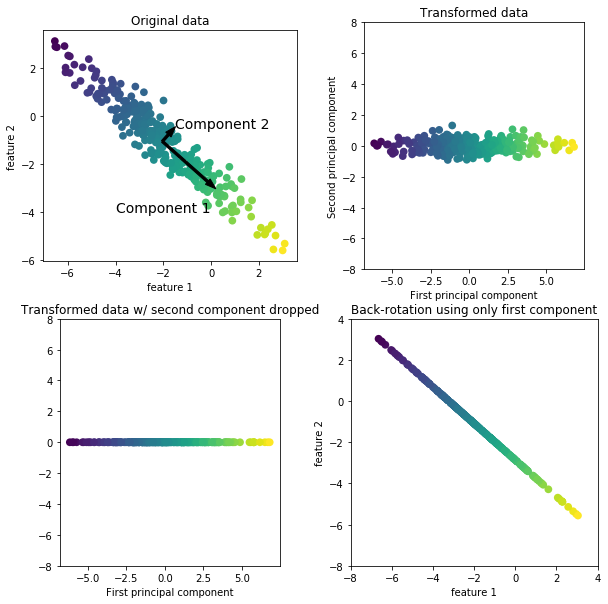

In [12]:
mglearn.plots.plot_pca_illustration()

 - The algorithm proceeds by first finding the direction of maximum variance, labeled as “Component 1”.
 
 - This is the direction in the data that contains most of the information, or in other words, the direction along which the features are most correlated with each other
 
 - Then, the algorithm finds the direction that contains the most information while being orthogonal (is at a right angle) to the first direction.
 
 - Although the two components are drawn as arrows, it doesn’t really matter where the head and the tail is; we could have drawn the first component from the center up to the top left instead of to the bottom right.
 
 * ---------------------------------------------------------------------------------------------------------------------------------------*
 
 
 
 #### The directions found using this process are called *principal components*, as they are the main directions of variance in the data. In general, there are as many principal components as original features.
 
 
 
 * ---------------------------------------------------------------------------------------------------------------------------------------*
 
 - The second plot shows the same data, but now rotated so that the first principal component aligns with the x axis, and the second principal component aligns with the y axis.
 
 - Before the rotation, the mean was subtracted from the data, so that the transformed data is centered around zero.
  
 - In the rotated representation found by PCA, the two axes are uncorrelated, meaning that the correlation matrix of the data in this representation is zero except for the diagonal.
   
 - We can use PCA for dimensionality reduction by retaining only some of the principal components.
 
 
 
 
 - This reduced the data from a two-dimensional dataset to a one-dimensional dataset. But instead of keeping only one of the original features, we found the most interesting direction (top left to bottom right in the first panel) and kept this direction, the first principal component.
 
 - Finally, we can undo the rotation, and add the mean back to the data
 
 
 
 
 ##  http://setosa.io/ev/principal-component-analysis/
 ## https://darkpgmr.tistory.com/110 
 ## https://wikidocs.net/7646
 ## https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22
 
 

### Applying PCA to the cancer dataset for visualization


 - One of the most common applications of PCA is visualizing high-dimensional datasets.
 
 - As we already saw in Chapter 1, it is hard to create scatter plots of data that has more than two features.
 
 - The breast cancer dataset has 30 features, which would result in 30 * 14 = 420 scatter plots!

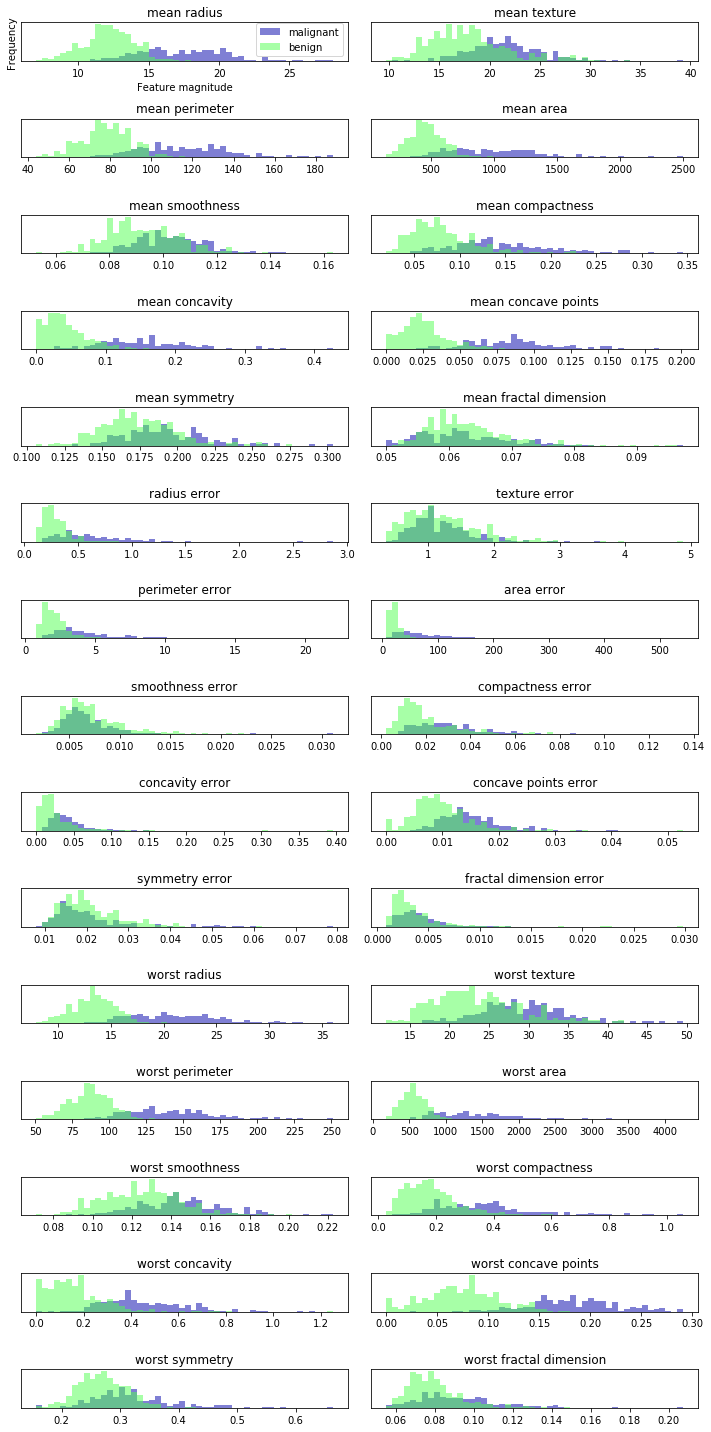

In [13]:
import numpy as np
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

 - Here we create a histogram for each of the features, counting how often a data point appears with a feature in a certain range (called a bin).
 
 - Each plot overlays two histograms, one for all of the points of the benign class (blue) and one for all the points in the malignant class (red).
 
 - This gives us some idea of how each feature is distributed across the two classes, and allows us to venture a guess as to which features are better at distinguishing malignant and benign samples.
  
  
  
 * ---------------------------------------------------------------------------------------------------------------------------------------* 
 
 
 - For example, the feature “smoothness error” seems quite uninformative, because the two histograms mostly overlap, while the feature “worst concave points” seems quite informative, because the histograms are quite disjoint.
 
 - However, this plot doesn’t show us anything about the, which indicate variables that are varying together .
 
 - We can find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot.

In [14]:
# e scale our data so that each feature has unit variance using StandardScaler:

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

- Learning the PCA transformation and applying it is as simple as applying a preprocessing transformation. 

- We instantiate the PCA object, find the principal components by calling the fit method, and then apply the rotation and dimensionality reduction by calling transform.


 - By default, PCA only rotates (and shifts) the data, but keeps all principal components. To reduce the dimensionality of the data, we need to specify how many components we want to keep when creating the PCA object:
 
 
 ## SVD : https://darkpgmr.tistory.com/106

In [15]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

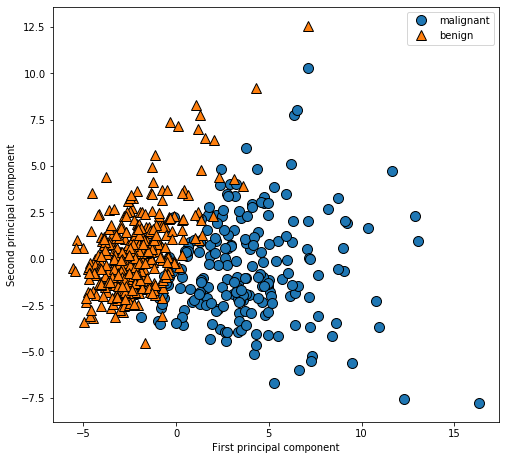

In [16]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

- It is important to note is that PCA is an unsupervised method, and does not use any class information when finding the rotation.

- It simply looks at the correlations in the data

- For the scatter plot above, we plotted the first principal component against the second principal component, and then used the class information to color the points.

- This can lead us to believe that even a linear classifier (that would learn a line in this space) could do a reasonably good job at distinguishing the two classes.

 - A downside of PCA is that the two axes in the plot above are often not very easy to interpret.
 
 - The principal components correspond to directions in the original data, so they are combinations of the original features. However, these combinations are usually very complex, as we’ll see below.
 
 - It simply looks at the correlations in the data.

In [17]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


- Each row in components_ corresponds to one principal component, sorted by their importance (the first principal component comes first, etc).

In [18]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

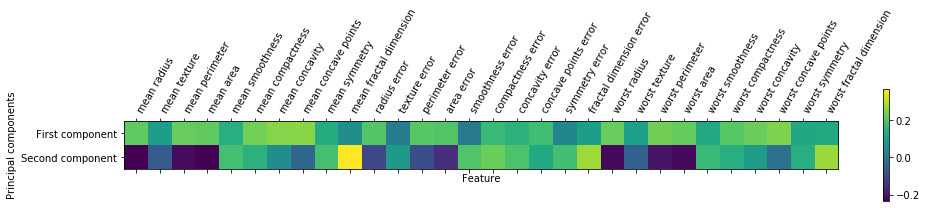

In [19]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

 - You can see that in the first component, all feature have the same sign (it’s negative, but as we mentioned above, it doesn’t matter in which direction you point the arrow).
 
 - That means that there is a general correlation between all features. As one measurement is high, the others are likely to be high as well.
 
 - The second component has mixed signs, and both of the components involve all of the 30 features.

# Eigenfaces for feature extraction

- Another application of PCA that we mentioned above is feature extraction.

- The idea behind feature extraction is that it is possible to find a representation of your data that is better suited to analysis than the raw representation you were given.

- Images are usually stored as red, green and blue intensities for each pixel. But images are made up of many pixels, and only together are they meaningful; objects in images are usually made up of thousands of pixels.



 - We will give a very simple application of feature extraction on images using PCA, using face images from the “labeled faces in the wild” dataset.
 
 - We use gray-scale versions of these images, and scale them down for faster processing. You can see some of the images below:

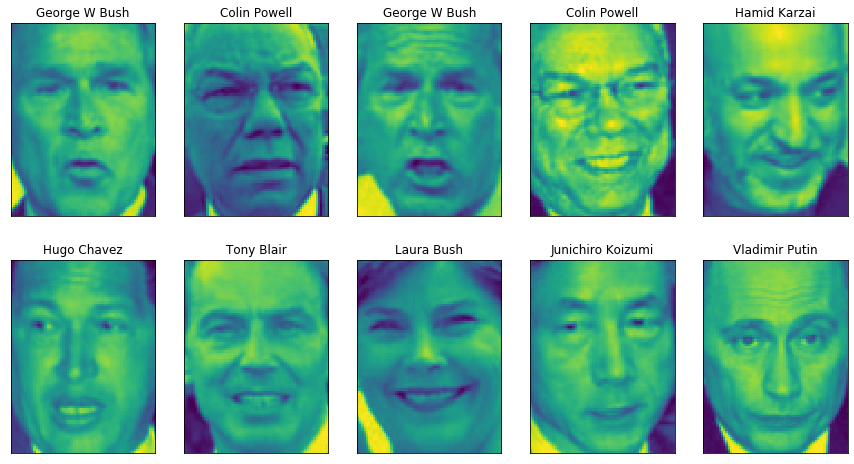

In [20]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [21]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (2489, 87, 65)
Number of classes: 43


In [22]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Ariel Sharon               77   Atal Bihari Vajpayee       24   
Bill Clinton               29   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Hamid Karzai               22   Hans Blix                  39   Hugo Chavez                71   
Igor Ivanov                20   Jack Straw                 28   Jacques Chirac             52   
Jean Chretien              55   Jennifer Aniston           21   Jennifer Capriati          42   
John Ashcroft              53   Juan Carlos Ferrero        28   Junichiro Koizumi          60   
Kofi Annan                 32   Laura Bush                 41   Lindsay Davenport          22   
Lleyton Hewitt             41 

- To make the data less skewed, we will only take up to 50 images of each person. Otherwise the feature extraction would be overwhelmed by the likelihood of George W Bush.

In [23]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

- A common task in face recognition is to ask if a previously unseen face belongs to a known person from a database.

- One way to solve this problem would be to build a classifier where each person is a separate class. However, there are usually many different people in face databases, and very few images of the same person (i.e. very few training examples per class).

- A simple solution is to use a one-nearest-neighbor classifier which looks for the most similar face image to the face you are classifying. A one-nearest-neighbor could in principle work with only a single training example per class. Let’s see how well KNeigh borsClassifier does here:

In [24]:
from sklearn.neighbors import KNeighborsClassifier
# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.27


In [25]:
from sklearn.neighbors import KNeighborsClassifier
# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Test set score of 3-nn: {:.5f}".format(knn.score(X_test, y_test)))

Test set score of 3-nn: 0.23760


- we obtain an accuracy of 26.6%, which is not actually that bad for a 62 class classification problem (random guessing would give you around 1/62 = 1.5% accuracy), but is also not great. We only correctly identify a person a every fourth time.

- This is where PCA comes in. Computing distances in the original pixel space is quite a bad way to measure similarity between faces [add a sentence saying why].

- We hope that using distances along principal components can improve our accuracy.

- Here we enable the whitening option of PCA, which rescales the principal components to have the same scale. This is the same as using StandardScaler after the transformation.

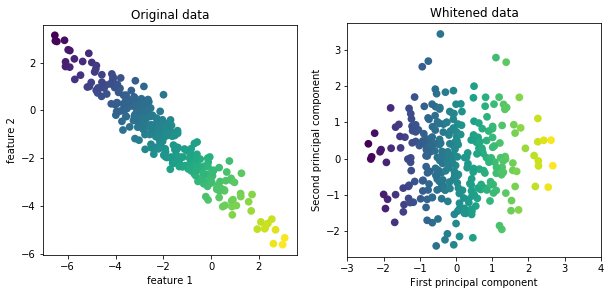

In [26]:
mglearn.plots.plot_pca_whitening()

 - We fit the PCA object to the training data and extract the first 100 principal components. Then we transform the training and test data:

In [27]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1146, 100)


- The new data has 100 features, the first 100 principal components. Now, we can use the new representation to classify our images using one-nearest-neighbors:

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.38


## For image data, we can also easily visualize the principal components that are found. Remember that components correspond to directions in the input space.

In [29]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


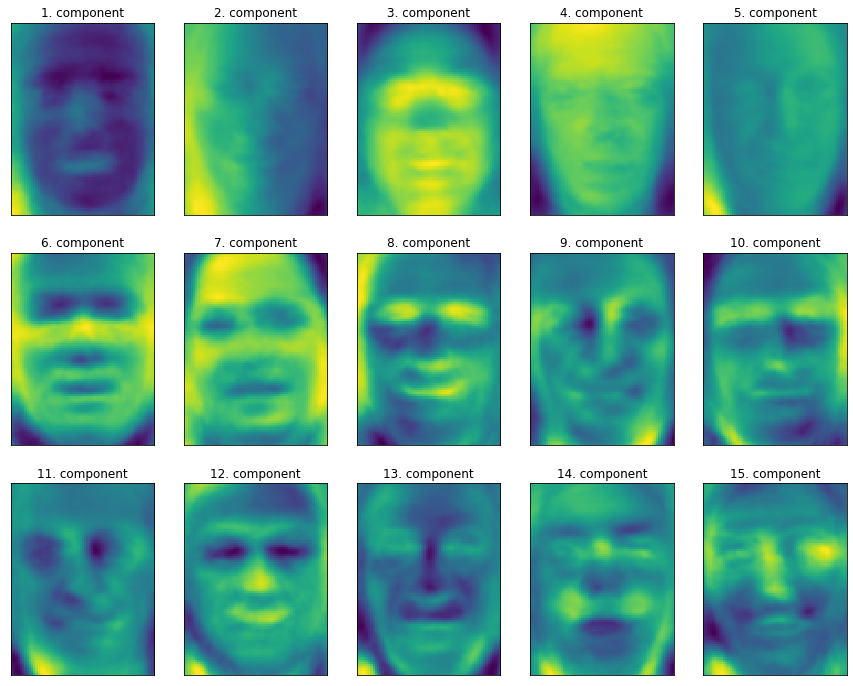

In [30]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

- While we certainly can not understand all aspects of these components, we can guess which aspects of the face images some of the components are capturing.

 - The first component seems to mostly encode the contrast between the face and the background, the second component encodes differences in lighting between the right and the left half of the face, and so on.
 
 - As the PCA is based on pixels, the alignment of the face (the position of eyes, chin and nose), as well as the lighting, both have a strong influence on how similar to images are in their pixel representation.
 
 - It’s important to keep in mind that algorithms often interpret data, in particular data that humans are used to understand, like images, quite differently from how a human would.
 
 - Above we introduced the PCA transformation as rotating the data, and then dropping the components with low variance.
 
 - Another useful interpretation is that we try to find some numbers (the new feature values after the PCA rotation), so that we can express the test points as a weighted sum of the principal components:

In [31]:
# FIXME hide this!
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=7, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=7,
                           cmap="viridis")

    ab = AnnotationBbox(imagebox, (.3 + .2 * i, 0.4),
                        pad=0.0,
                        xycoords='data'
                        )
    ax.add_artist(ab)
    if i == 0:
        plt.text(.18, .25, 'x_{} *'.format(i), fontdict={'fontsize': 50})
    else:
        plt.text(.15 + .2 * i, .25, '+ x_{} *'.format(i),
                 fontdict={'fontsize': 50})

plt.text(.95, .25, '+ ...', fontdict={'fontsize': 50})

plt.text(.13, .3, r'\approx', fontdict={'fontsize': 50})
plt.axis("off")
#plt.savefig("images/03-face_decomposition.png")
plt.close()

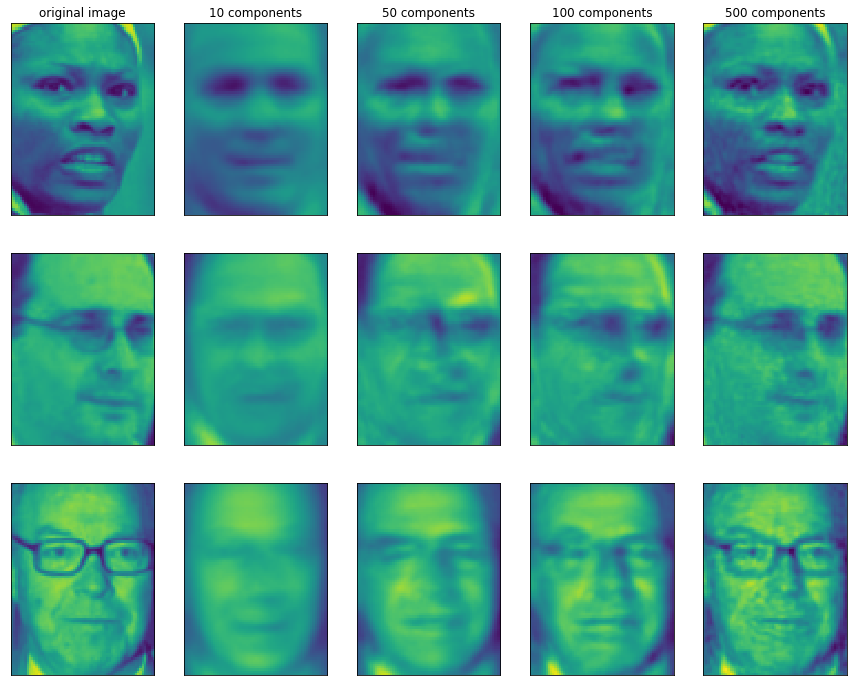

In [32]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

- You can see that with using only the first 10 principal components, only the essence of the picture, like the face orientation and lighting, is captured.

- Using more and more principal components, more and more details in the image are preserved.

- Using as many components as there are pixels would mean that we would not discard any information after the rotation, and we would reconstruct the image perfectly.

- We can also try to use PCA to visualize all the faces in the dataset in a scatter plot using the first two principal components, with classes given by who is shown in the image, similarly to what we did for the cancer dataset:

Text(0, 0.5, 'Second principal component')

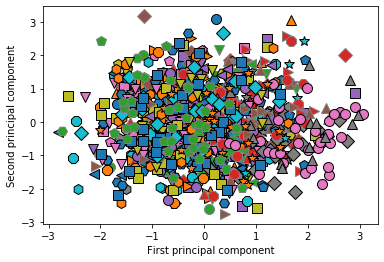

In [33]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

# https://kolikim.tistory.com/27?category=733478

# Non-Negative Matrix Factorization (NMF)
## https://kolikim.tistory.com/28?category=733478


 - Non-negative matrix factorization is another unsupervised learning algorithm thataims to extract useful features. 
 
 - It works similarly to PCA and can also be used for dimensionality reduction.
 
 -  As in PCA we are trying to write each data point as a weighted sum of some components as illustrated in Figure decomposition. 
 
 - In PCA,we wanted components that are orthogonal, and that explain as much variance of the data as possible. In NMF, we want the components and the coefficients to be nonnegative; that is, we want both the components and the coefficients to be greater or equal then zero.
 
  - Consequently, this method can only applied to data where each feature is nonnegative, as a non-negative sum of non-negative components can not become negative.
  
  - the process of decomposing data into a non-negative weighted sum is particularly helpful for data that is created as the addition of several independent sources, such as an audio track of multiple speakers, or music with many instruments.
  
  ## Applying NMF to synthetic data
  
  - In contrast to PCA, we need to ensure that our data is positive for NMF to be able to operate on the data.
  
  - This means where the data lies relative to the origin (0, 0) actually matters for NMF. Therefore, you can think of the non-negative components that are extracted as directions from (0, 0) towards the data.

Text(0.5, 0.98, 'nmf_illustration')

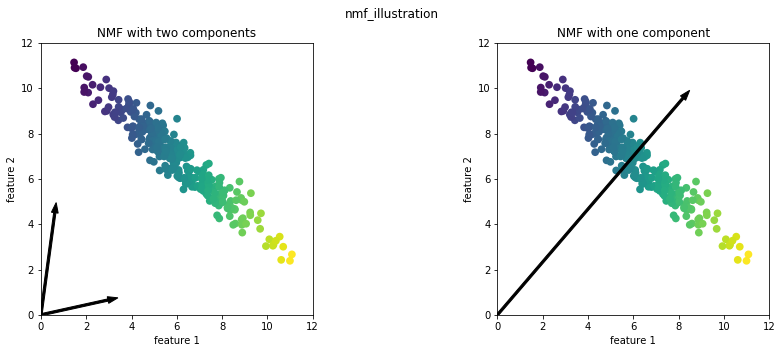

In [34]:
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_nmf_illustration()
plt.suptitle("nmf_illustration")

 - If there are enough components to perfectly reconstruct the data (as many components are there are features), the algorithm will choose directions that point towards the extremes of the data.
 
 - If we only use a single component, NMF creates a component that points towards the mean, as pointing there best explains the data. You see that in contrast to PCA, reducing the number of components not only removes directions, it actually changes all directions!
 
 - NMF uses a random initialization, which might lead to different results depending on the random seed.
 
 ## Applying NMF to face images
 
  - Now, let’s apply NMF to the “labeled faces in the wild” dataset we used above.

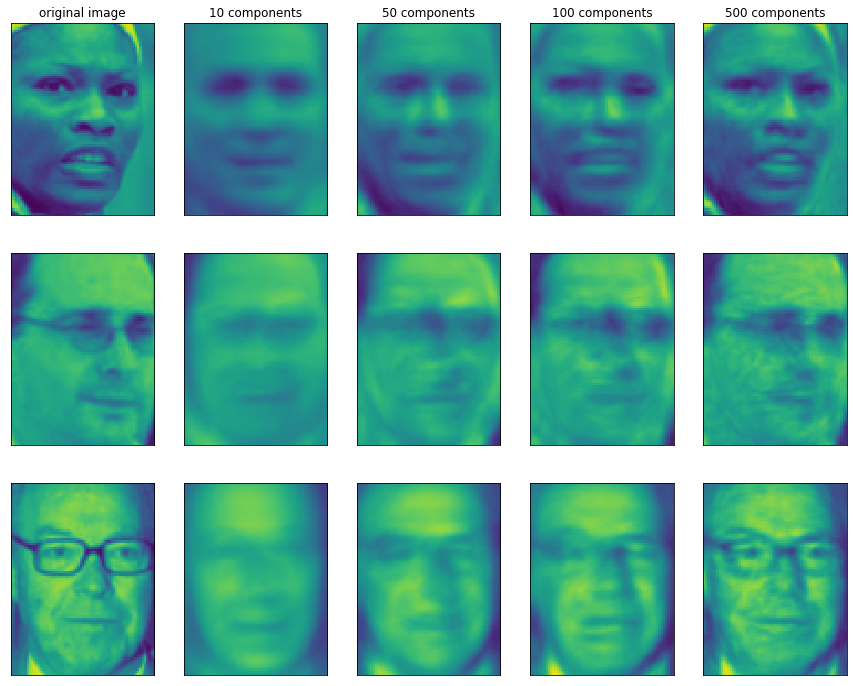

In [35]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

## The quality of the back-transformed data is similar to PCA, but slightly worse.

- This is expected, as PCA finds the optimum directions in terms of reconstruction.

### NMF is usually not used for the ability to reconstruct or encode data, but rather for finding interesting patterns within the data.

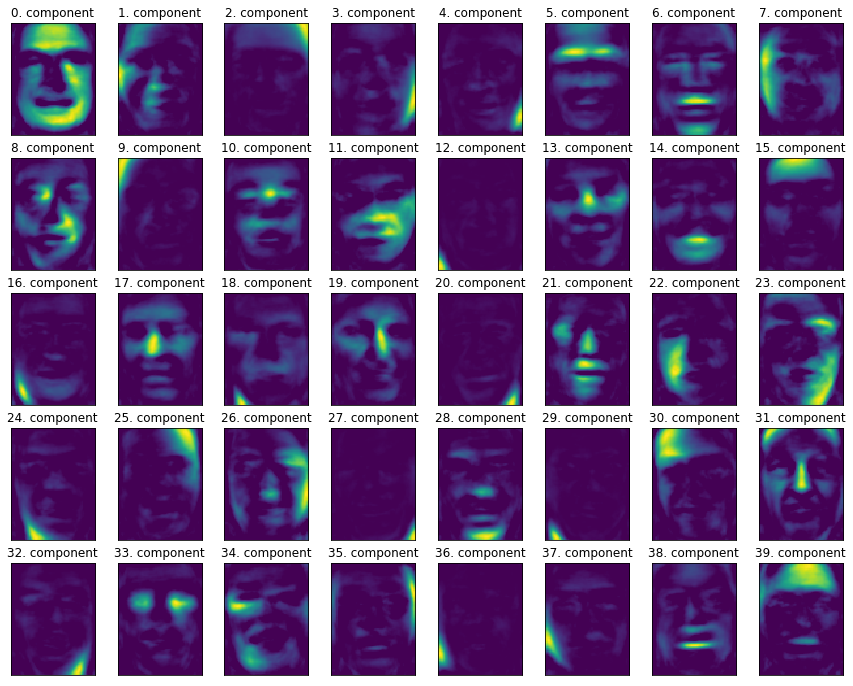

In [36]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=40, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(5, 8, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

### These components are all positive, and so resemble prototypes of faces much more so than the components shown for PCA in Figure Eigenfaces.

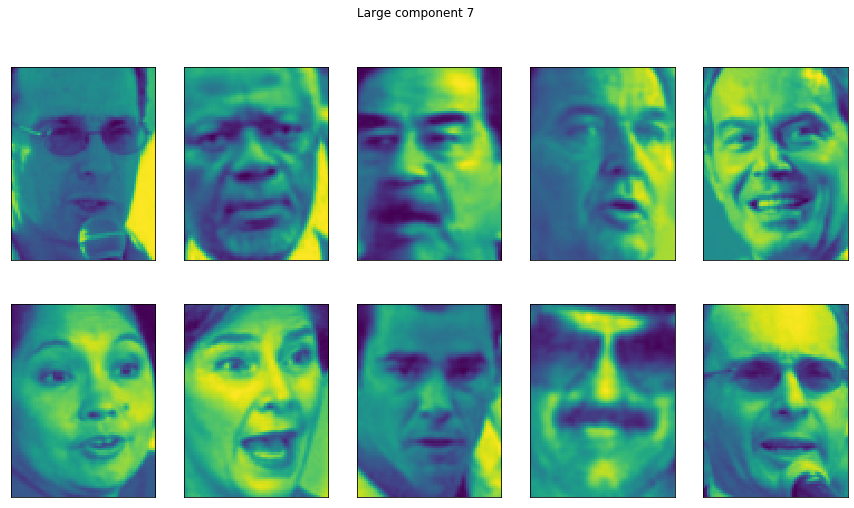

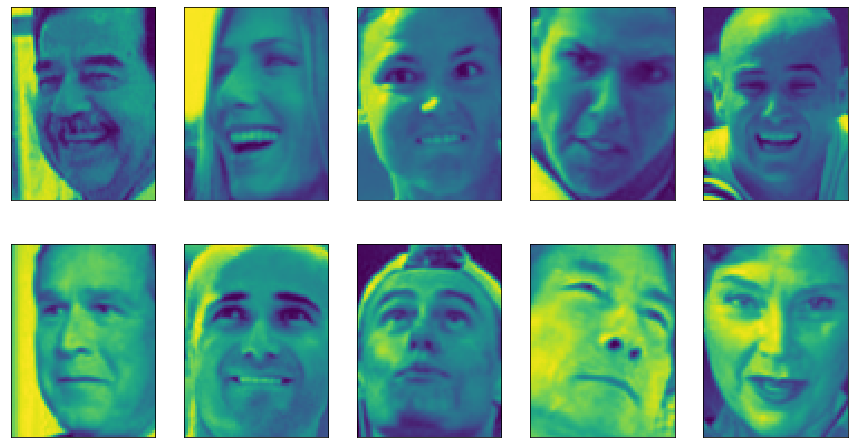

In [37]:

compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

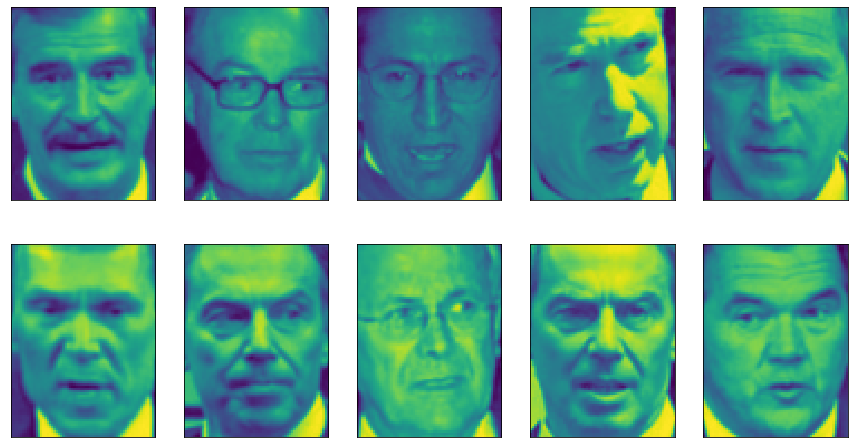

In [38]:
compn = 20
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

### As mentioned above, extracting patterns like these works best for data with additive structure, including audio, gene expression data, and text data.

Text(0, 0.5, 'Signal')

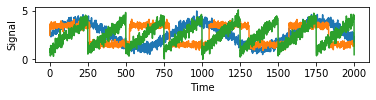

In [39]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [45]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


In [46]:
# Mix data into a 100 dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [47]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

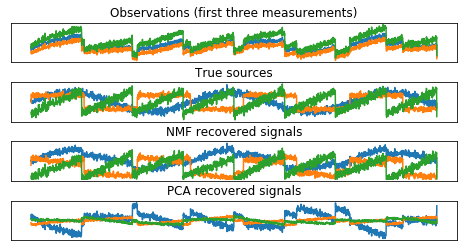

In [48]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

### There are many other algorithms that can be used to decompose each data point into a weighted sum of a fixed set of components, as PCA and NMF do.

- If you are interested in these kinds of pattern extraction, we recommend to study the user guide of Independent Component Analysis (ICA), Factor Analysis (FA) and Sparse Coding (dictionary learning), which are widely used decomposition methods.

# https://markov.tistory.com/39
# https://kolikim.tistory.com/29

# Manifold learning with t-SNE

- While PCA is often a good first approach for transforming your data so that you might be able to visualize it using a scatter plot, the nature of the method (applying a rotation and then dropping directions) limits its usefulness, as we saw with the scatter plot of the labeled faces in the wild

- There is a class of algorithms for visualization called manifold learning algorithms which allows for much more complex mappings, and often provides better visualizations. A particular useful one is the t-SNE algorithm.


### Manifold learning algorithms are mainly aimed at visualization, and so are rarely used to to generate more than two new features.


- Some of them, including t-SNE, compute a new representation of the training data, but don’t allow transformations of new data

 - This means these algorithms can not be applied to a test set: rather, they can only transform the data they were trained for.
 
 
 #### Manifold learning can be useful for exploratory data analysis, but is rarely used if the final goal is supervised learning.
 
 
 ##### The idea behind t-SNE is to find a two-dimensional representation of the data that preserve the distances between points as best as possible.
 
 
 - t-SNE tarts with a random two-dimensional representation for each data point, and then tries to make points closer that are close in the original feature space, and points far apart that are far apart in the original feature space. 
 
 - t-SNE puts more emphasis on points that are close by, rather than preserving distances between far apart points. In other words, it tries to preserve the information of which points are neighbors to each other.

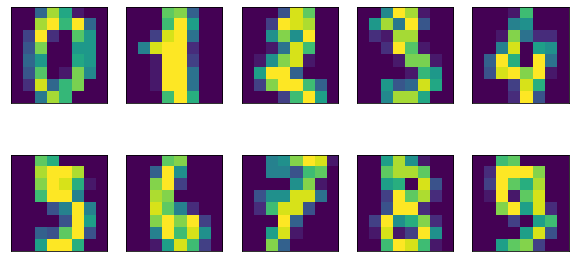

In [49]:
# We will apply the t-SNE manifold learning algorithm on a dataset of handwritten digits that is included in scikit-learn [Footnote: not to be confused with the much larger MNIST dataset].

from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

- Let’s use PCA to visualize the data reduced to two dimensions. We plot the first two ㅋprincipal components, and color each dot by its class:

Text(0, 0.5, 'Second principal component')

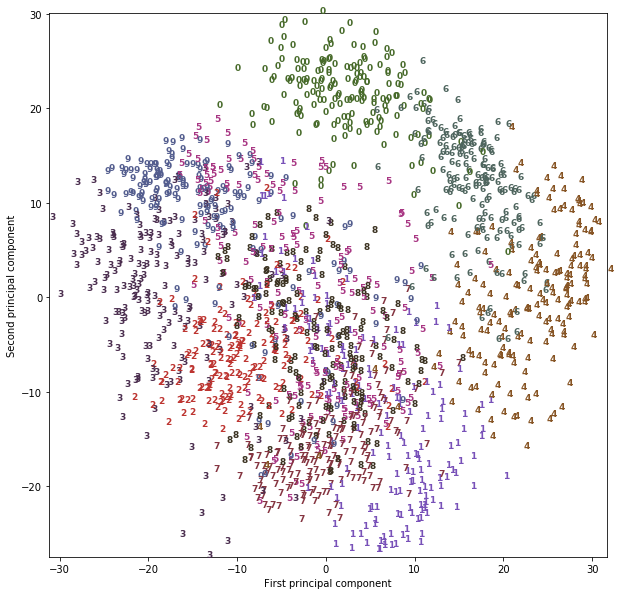

In [50]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

- The digits zero, six and four are relatively well-separated using the first two principal components, though they still overlap. Most of the other digits overlap significantly

- Let’s apply t-SNE to the same dataset, and compare results. As t-SNE does not support transforming new data, the TSNE class has no transform method.

- Instead, we can call the fit_transform method, which will build the model, and immediately return the transformed data:

In [51]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

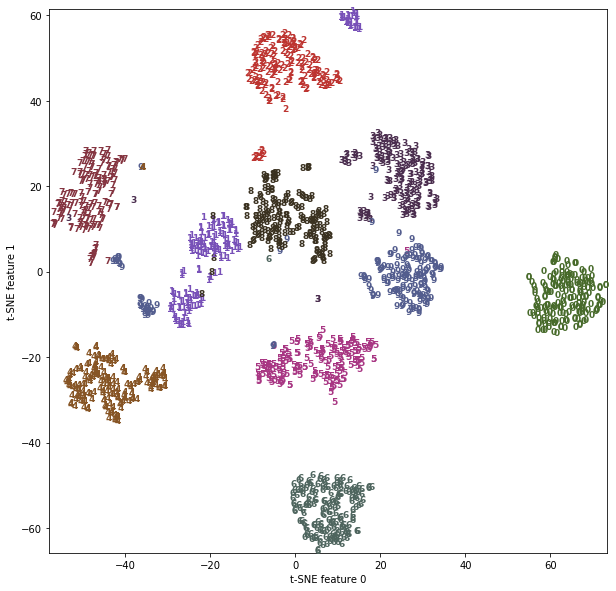

In [52]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

## Keep in mind that this method has no knowledge of the class labels: it is completely unsupervised.

- You can try playing with perplexity and early_exaggeration, though the effects are usually minor.

### https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

# Clustering

- As we described above, clustering is the task of partitioning the dataset into groups, called clusters.

- The goal is to split up the data in such a way that points within a single cluster are very similar and points in different clusters are different

## k-Means clustering

- k-Means clustering is one of the simplest and most commonly used clustering algorithms. It tries to find cluster centers that are representative of certain regions of the data.



  - The algorithm alternates between two steps: assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points that are assigned to it.
  
  - The algorithm is finished when the assignment of instances to clusters no longer changes.

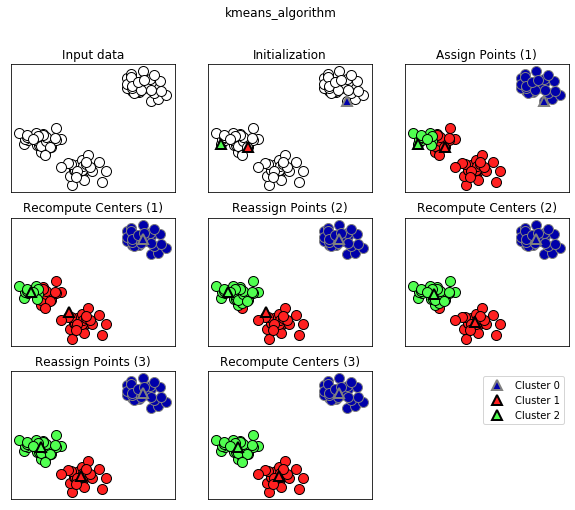

In [53]:
mglearn.plots.plot_kmeans_algorithm()
plt.suptitle("kmeans_algorithm");

 - We specified that we are looking for three clusters, so the algorithm was initialized by declaring three data points as cluster centers (see “Initialization”).
 
 - Then the iterative algorithm starts: Each data point is assigned to the cluster center it is closest to (see “Assign Points (1)”). Next, the cluster centers are updated to be the mean of the assigned points (see “Recompute Centers (1)”).
 
 - Given new data points, k-Means will assign them to the closest cluster center. Here are the boundaries of the cluster centers that were learned in the diagram above:

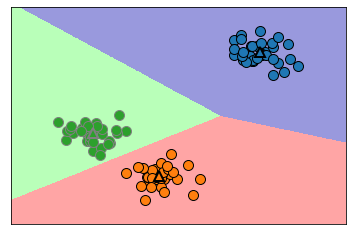

In [54]:
mglearn.plots.plot_kmeans_boundaries()

- Applying k-Means with scikit-learn is quite straight-forward. Here we apply it to the synthetic data that we used for the plots above. We instantiate the KMeans class, and set the number of clusters we are looking for [footnote: If you don’t provide n_clusters it is set to eight by default.

In [55]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [56]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


As we asked for three clusters, the clusters are numbered 0 to 2.

You can also assign cluster labels to new points, using the predict method. Each new point is assigned to the closest cluster center when predicting, but the existing model is not changed.

In [57]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


 - You can see thgat clustering is somewhat similar to classification, in that each item gets a label. However, there is no ground truth, and consequently the labels themselveshave no a priori meaning.
 
 
 
 - Here is a plot of this data again. The cluster centers are stored in the cluster_centers_ attribute, and we plot them as triangles:

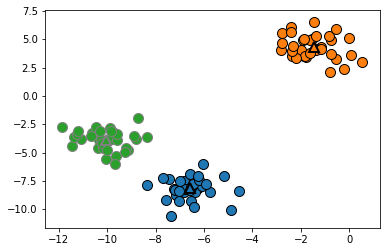

In [58]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

- We can also use more or less cluster centers:

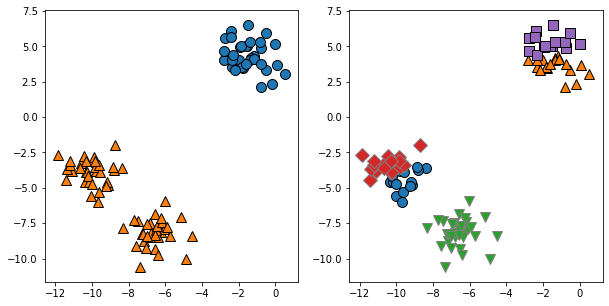

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

## Failure cases of k-Means

- Even if you know the “right” number of clusters for a given dataset, k-Means might not always be able to recover them.
 
- Each cluster is defined solely by its center, which means that each cluster is a convex shape. As a result of this is that k-Means can only capture relatively simple shapes.

- k-Means also assumes that all clusters have the same “diameter” in some sense; it always draws the boundary between clusters to be exactly in the middle between the cluster centers.

Text(0, 0.5, 'Feature 1')

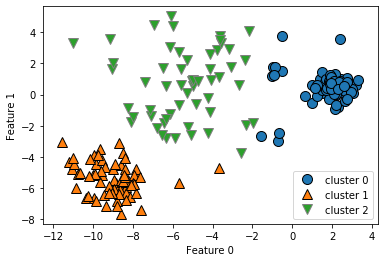

In [60]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

 - k-Means also assumes that all directions are equally important for each cluster
 
 - However, these groups are stretched towards the diagonal. As k-Means only considers the distance to the nearest cluster center, it can’t handle this kind of data.

Text(0, 0.5, 'Feature 1')

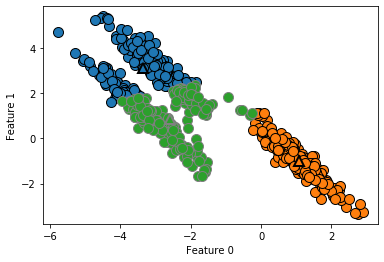

In [61]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- k-Means also performs poorly if the clusters have more complex shapes, like the two_moons data we encountered in Chapter 2:

Text(0, 0.5, 'Feature 1')

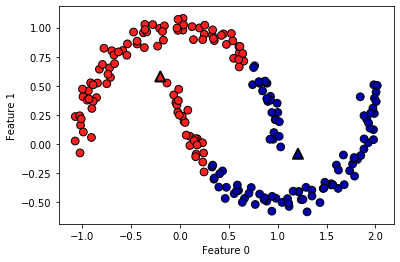

In [62]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

###  Here, we would hope that the clustering algorithm can discover the two half-moon shapes. However, this is not possible using the k-Means algorithm.


# Vector Quantization - Or Seeing k-Means as Decomposition

- Even though k-Means is a clustering algorithm, there are interesting parallels between k-Means and decomposition methods like PCA and NMF that we discussed above.

#### You might remember that PCA tries to find directions of maximum variance in the data, while NMF tries to find additive components, which often correspond to “extremes” or “parts” of the data (see Figure nmf_illustration).

- Both methods tried to express data points as a sum over some components.

- You can think of that as each point being represented using only a single component, which is given by the cluster center. This view of k-Means as a decomposition method, where each point is represented using a single component, is called vector quantization.

# http://blog.naver.com/PostView.nhn?blogId=sksd321&logNo=220900937895&redirect=Dlog&widgetTypeCall=true
# https://gorakgarak.tistory.com/481



- Here is a side-by-side comparison of PCA, NMF and k-Means, showing the components extracted, as well as reconstructions of faces from the test set using 100 components

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

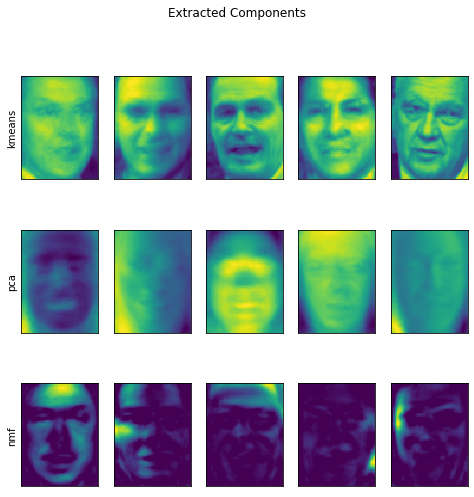

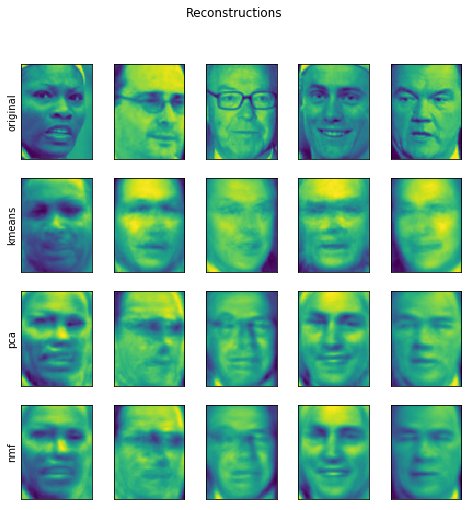

In [64]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

- An interesting aspect of vector quantization using k-Means is that we can use many more clusters than input dimensions to encode our data. Let’s go back to the two_moons data. Using PCA or NMF, there is nothing much we can do to this data, as it lives in only two dimensions.

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


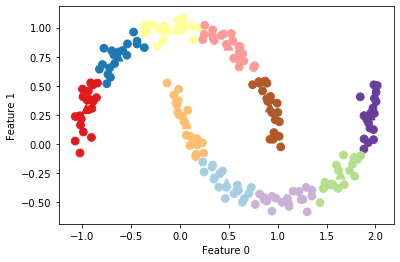

In [66]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

- We used 10 cluster centers, which means each point is now assigned a number between 0 and 9.

- Using this 10-dimensional representation, it would now be possible to separate the two half-moon shapes using a linear model, which would not have been possible using the original two features. [really? can you show what that would look like, maybe?]

- It is also possible to get an even more expressive representation of the data by using the distances to each of the cluster centers as features.

In [67]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


- k-Means is a very popular algorithm for clustering, not only because it is relatively easy to understand and implement, but also because it runs relatively quickly. k-Means scales easily to large datasets, and scikit-learn even includes a more scalable variant in the MiniBatchKMeans class, which can handle very large datasets.

- One of the drawbacks of k-Means is that it relies on a random initialization, which means the outcome of the algorithm depends on a random seed.


- By default, scikitlearn runs the algorithm 10 times with 10 different random initializations, and returns the best result [Footnote: best here meaning that the sum of variances of the clusters is small].


- Further downsides of k-Means are the relatively restrictive assumptions made on the shape of clusters, and the requirement to specify the number of clusters you are looking for (which might not be known in a real-world application).


- Next, we will look at two more clustering algorithms that improve upon these properties in some ways.

# Agglomerative Clustering

- The algorithm starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied.

- The stopping criterion implemented in scikit-learn is the number of clusters, so similar cluster are merged until only the specified number of clusters is left.

- There are several linkage criteria that specify how exactly “most similar cluster” is measured. [this sentence looks a lot like the next sentence - combine into one]



 - The following three choices are implemented in scikit-learn:
   - "ward”, which is the default choice. Ward picks the two clusters to merge such that the variance within all clusters increases the least. This often leads to clusters that are relatively equally sized.
   
   - “average” linkage merges the two clusters that have the smallest average distance between all their points.
   
   -  “complete” linkage (also known as maximum linkage) merges the two clusters that have the smallest maximum distance between their points.

Ward is generally a good default; all our examples below will use ward.

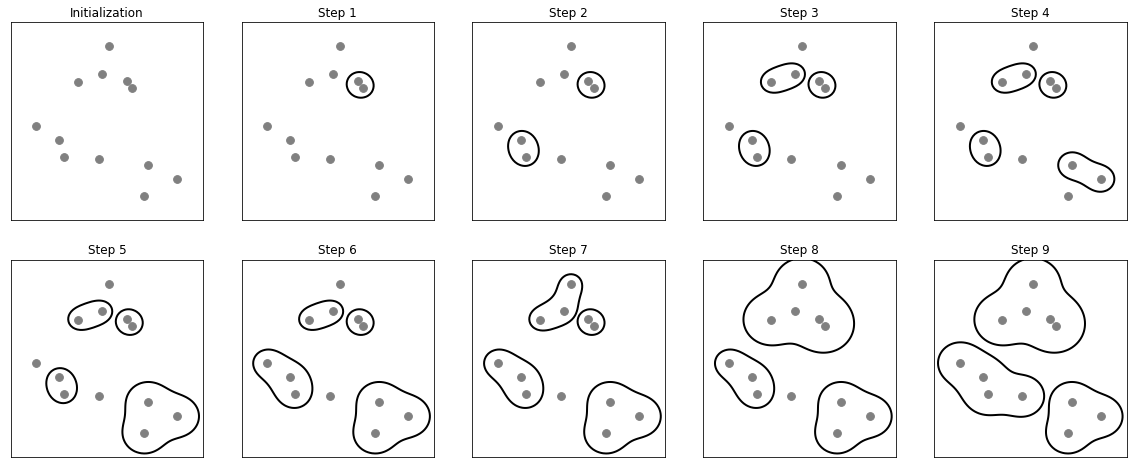

In [68]:
mglearn.plots.plot_agglomerative_algorithm()

- In the beginning, each point is its own cluster. Then, in each step, the two clusters that are closest are merged

- Let’s have a look at how agglomerative clustering performs on the simple threecluster data we used above.

Text(0, 0.5, 'Feature 1')

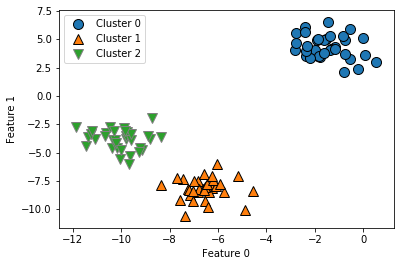

In [69]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Hierarchical Clustering and Dendrograms

- Agglomerative clustering produces what is known as a hierarchical clustering. The clustering proceeds iteratively, and every point makes a journey from being a single point cluster to belonging to some final cluster.

- Each intermediate step provides a clustering of the data (with a different number of clusters)

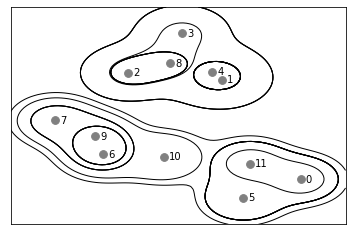

In [70]:
mglearn.plots.plot_agglomerative()

- While this visualization provides a very detailed view of the hierarchical clustering, it relies on the two-dimensional nature of the data, and can therefore not be used on datasets that have more than two features.

- There is, however, another tool to visualize hierarchical clustering, called a dendrogram (as shown in Figure dendrogram below)

- Unfortunately, scikit-learn currently does not have the functionality to draw dendrograms. However, you can generate them easily using scipy.

- The scipy clustering algorithms have a slightly different interface from the scikit-learn clustering algorithms.

- scipy provides function that take data arrays X linkage array encoding cluster similarities.

Text(0, 0.5, 'Cluster distance')

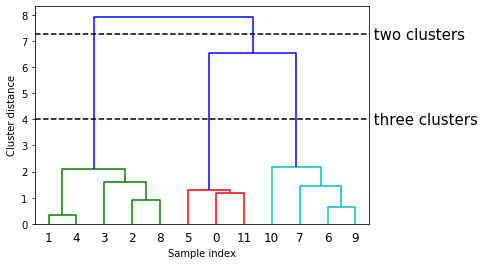

In [71]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

- The dendrogram shows data points as points on the bottom (numbered from zero to eleven). Then, a tree is plotted with these points (representing single-point clusters) as the leafs, and a new node parent is added for each two clusters that are joined.

- The y axis in the dendrogram not only specifies when in the agglomerative algorithm two clusters get merged. The length of each branch also shows how far apart the merged clusters are.

- Unfortunately, agglomerative clustering still fails at separating complex shapes like the two_moons dataset. The same is not true for the next algorithm we will look at, DBSCAN.

# DBSCAN

# https://bcho.tistory.com/1205

- The main benefits of DBSCAN are that a) it does not require the user to set the number of clusters a priori, b) it can capture clusters of complex shapes, and c) it can identify point that are not part of any cluster.


- DBSCAN is somewhat slower than agglomerative clustering and k-Means, but still scales to relatively large datasets.


- The way DBSCAN works is by identifying points that are in “crowded” regions of the feature space, where many data points are close together.

- These regions are referred to as dense regions in feature space. The idea behind DBSCAN is that clusters form dense regions of data, separated by regions that are relatively empty.

- Points that are within a dense region are called core samples, and they are defined as follows.

- There are two parameters in DBSCAN, min_samples and eps. If there are at least min_samples many data points within a distance of eps to a given data point, it’s called a core sample.

- It then finds all points with distance eps or less. If there are less than min_samples points within distance eps or less, this point is labeled as noise, meaning that this point doesn’t belong to any cluster.

- If they have not been assigned a cluster yet, they are assigned the new cluster label we just created.

- The cluster grows, until there are no more core-samples within distance eps of the cluster.

- In the end, there are three kinds of points: core points, points that are within distance eps of core points (called boundary points), and noise. When running the DBSCAN algorithm on a particular dataset multiple times, the clustering of the core points is always the same, and the same points will always be labeled as noise.

 - Therefore, the cluster membership of boundary points depends on the order in which points are visited.

In [72]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


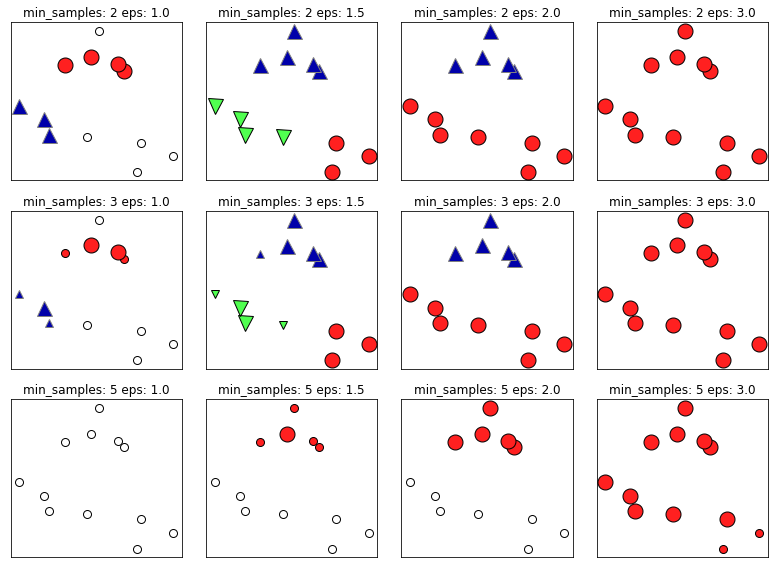

In [73]:
mglearn.plots.plot_dbscan()

- In this plot, points that belong to clusters are colored, while the noise points are shown in white.

- Core samples are shown as large points, while border points are displayed as smaller points.

- Increasing eps (going from left to left to right in the figure) means that more points will be included in a cluster

- Increasing min_samples (going from top to bottom in the figure) means that fewer points will be core points, and more points will be labeled as noise.

- While DBSCAN doesn’t require setting the number of clusters explicitly, setting eps implicitly controls how many clusters will be found. 

- Finding a good setting for eps is sometimes easier after scaling the data using Stand ardScaler or MinMaxScaler, as using these scaling techniques will ensure that all features have similar ranges.

Text(0, 0.5, 'Feature 1')

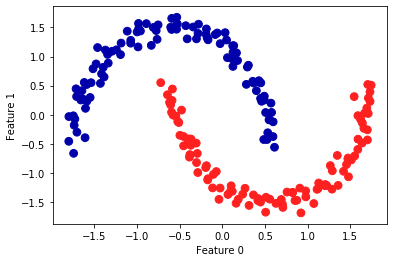

In [75]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- If we decrease eps to 0.2 (from the default of 0.5), we will get 8 clusters, which are clearly too many. Increasing eps to 0.7 results in a single cluster.

Text(0, 0.5, 'Feature 1')

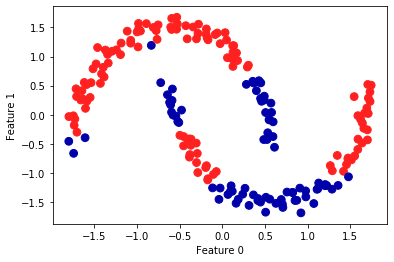

In [76]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN(eps = 0.2)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

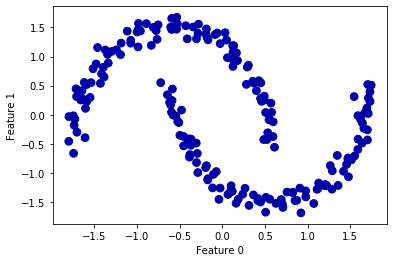

In [77]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN(eps = 0.7)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

 - When using DBSCAN, you need to be careful about handling the returned cluster assignments

# Comparing and evaluating clustering algorithms

- After talking about the algorithms behind k-Means, agglomerative clustering and DBSCAN, we will now compare them on some real world datasets.

### Evaluating clustering with ground truth

- There are metrics that can be used to assess the outcome of a clustering algorithm relative to a ground truth clustering, the most important ones being the adjusted rand index (ARI) and normalized mutual information (NMI), which both provide a quantitative measure between 0 and 1.

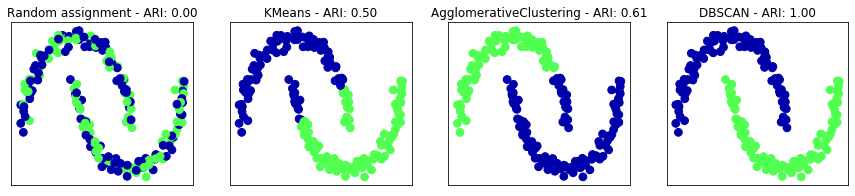

In [78]:

from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

- The adjusted rand index provides intuitive results, with a random cluster assignment having a score of 0, and DBSCAN (which recovers the desired clustering perfectly) having a score of 1

- A common mistake when evaluating clustering in this way is to use accuracy_score instead of a clustering metric like adjusted_rand_score and normalized_mutual_info_score.

- The problem in using accuracy is that it requires the assigned cluster labels to exactly match the ground truth. However, the cluster labels themselves are meaningless, and only which points are in the same cluster matters:

In [79]:
from sklearn.metrics import accuracy_score

# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# adjusted rand score is 1, as the clustering is exactly the same:
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


# Evaluating clustering without ground truth

- practice, there is a big problem with the evaluation using measures like ARI.

- When applying clustering algorithms, there is usually no ground truth to which to compare.

- If we knew the right clustering of the data, we could use this information to build a supervised model like a classifier.

- There are scoring metrics for clustering that don’t require ground truth, like the silhouette coefficient. However, these often don’t work well in practice. The silhouette score computes the compactness of a cluster, where higher is better, with a perfect score of 1. While compact clusters are good, compactness doesn’t allow for complex shapes.

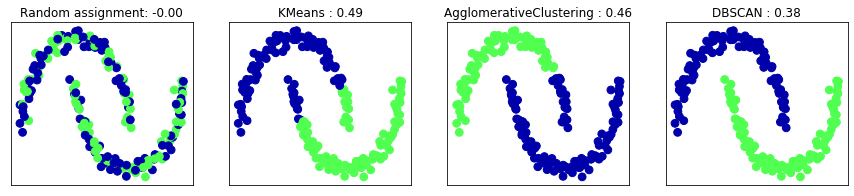

In [80]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))

 - As you can see, k-Means gets the highest silhouette score, even though we might prefer the result produced by DBSCAN.
 
 - A slightly better strategy for evaluating clusters are robustness-based clustering metrics. 
 
 - These run an algorithm after adding some noise to the data, or using different parameter settings, and compare the outcomes.
 
 - The idea is that if many algorithm parameters and many perturbations of the data return the same result, it is likely to be trustworthy.
 
 - Unfortunately, this strategy is not implemented in scikit-learn at the time of writing.
 
 - Even if we get a very robust clustering, or a very high silhouette score, we still don’t know if there is any semantic meaning in the clustering, or whether the clustering reflects an aspect of the data that we are interested in.

In [81]:
# extract eigenfaces from lfw data and transform data
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

In [82]:
# apply DBSCAN with default parameters
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


Even when considering groups of three points, everything is labeled as noise. So we need to increase eps.

In [83]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [84]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0]


- Using a much larger eps=15 we get only a single clusters and noise points

- We can use this result and find out what the “noise” looks like compared to the rest of the data.

In [85]:
# count number of points in all clusters and noise.
# bincount doesn't allow negative numbers, so we need to add 1.
# the first number in the result corresponds to noise points
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

Number of points per cluster: [  25 1504]


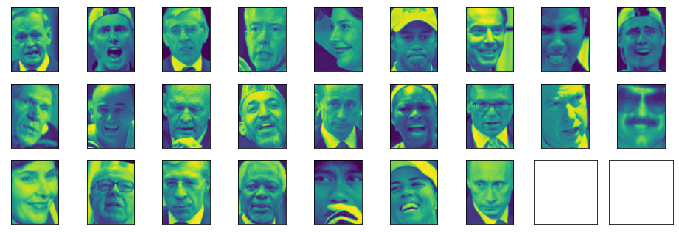

In [86]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

- Comparing these images to the random sample of face images from Figure some_faces, we can guess why they were labeled as noise: the image in the sixth image in the first row one has a person drinking from a glass, there are images with hats, and the second to last image has a hand in front of the face.

 - This kind of analysis, trying to find “the odd one out”, is called outlier detection.
 
 - If this was a real application, we might try to do a better job in cropping images, to get more homogeneous data

 - If we want to find more interesting clusters than just one large one, we need to set eps smaller, somewhere between 15 and 0.5 (the default). Let’s have a look at what different values of eps result in:

In [88]:

for eps in [1, 3, 5, 7, 9, 11, 13, 15, 17]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=1
Number of clusters: 1
Cluster sizes: [1529]

eps=3
Number of clusters: 1
Cluster sizes: [1529]

eps=5
Number of clusters: 1
Cluster sizes: [1529]

eps=7
Number of clusters: 12
Cluster sizes: [1477    3    3   12   12    3    3    3    3    3    4    3]

eps=9
Number of clusters: 5
Cluster sizes: [959 561   3   3   3]

eps=11
Number of clusters: 2
Cluster sizes: [ 324 1205]

eps=13
Number of clusters: 2
Cluster sizes: [  98 1431]

eps=15
Number of clusters: 2
Cluster sizes: [  25 1504]

eps=17
Number of clusters: 2
Cluster sizes: [   9 1520]


- For small numbers of eps, again all points are labeled as noise.

- What is interesting to note is that there are never more than one large cluster.

- There is at most one large cluster containing most of the points, and some smaller clusters.

- This indicates that there are not two or three different kinds of face images in the data that are very distinct, but that all images are more or less equally similar (or dissimilar) from the rest.

 - The results for eps=7 look most interesting, with many small clusters. We investigate this clustering in more detail, by visualizing all of the points in each of the 13 small clusters:

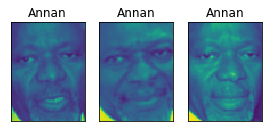

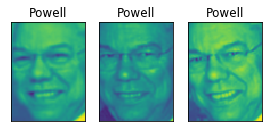

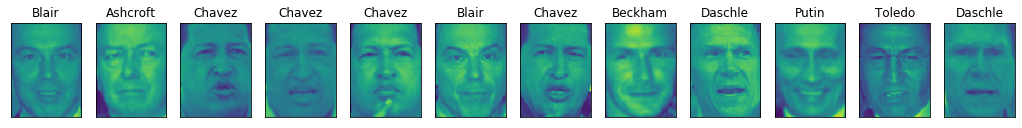

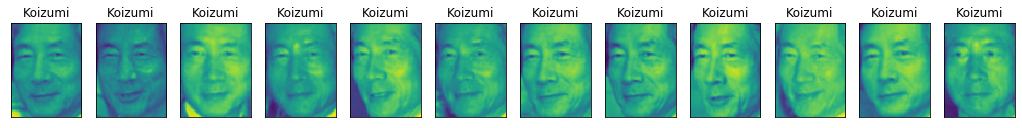

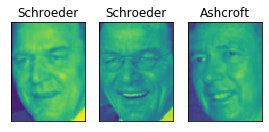

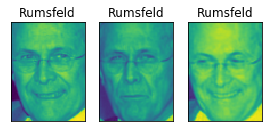

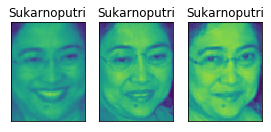

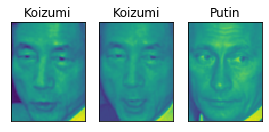

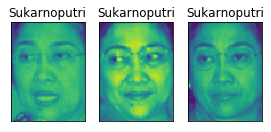

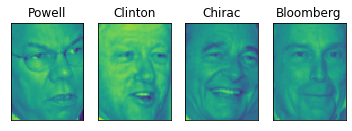

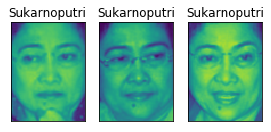

In [90]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images =  np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):

        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

 - Some of the clusters correspond to people with very distinct faces
 - Some of the clusters contain faces of multiple people, but they share a similar orientation of the face and expression.
 
 
 
 - As you can see, we are doing a very manual analysis here, different from the much more automatic search approach we could use for supervised learning, based on $R^2$ or accuracy.

# Analyzing the faces dataset with k-Means

- We saw that it was not possible to create more than one big cluster using DBSCAN.

- Agglomerative clustering and k-Means are much more likely to create clusters of even size, but we do need to set a number of clusters.

- We could set the number of clusters to the known number of people in the dataset, though it is very unlikely that an unsupervised clustering algorithm will recover them.

In [91]:
# extract clusters with k-Means
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

Cluster sizes k-means: [ 98 224 107 175 116 220 358  92  93  46]


- As you can see, k-Means clustering partitioned the data into relatively similarly sized clusters from 133 to 318. This is quite different from the result of DBSCAN.

- We can further analyze the outcome of k-Means by visualizing the cluster centers. As we clustered in the representation produced by PCA,

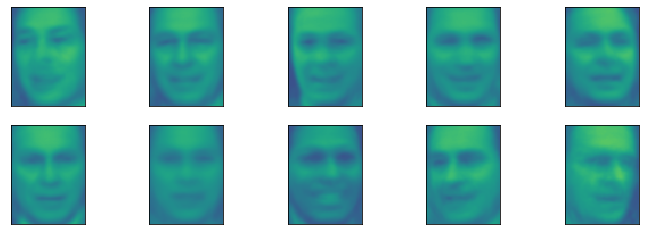

In [92]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
              vmin=0, vmax=1)

- The cluster centers found by k-Means are very smooth version of faces.

- This is not very surprising, given that each center is an average of 133 to 318 face images.

- For a more detailed view, we show for each cluster center the five most typical images in the cluster (the images that are assigned to the cluster and closest to the cluster center) and the five most atypical images in the cluster (the images that are assigned to the cluster and furthest to the cluster center):

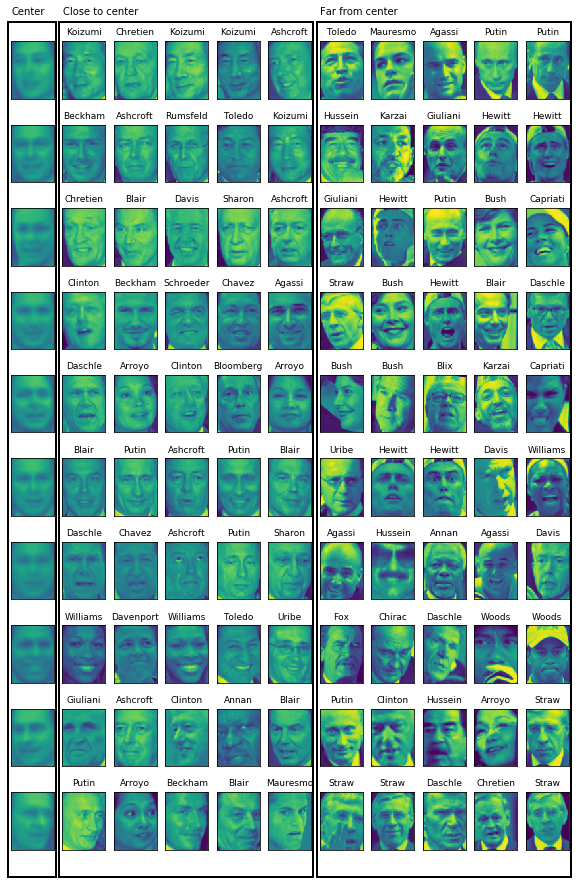

In [93]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,
                                y_people, people.target_names)

- The “atypical” points are not very similar to the cluster center, though, and the assignment seems somewhat arbitrary.

- Using a larger number of clusters, the algorithm could find finer distinctions. However, adding more clusters makes manual inspection even harder.

# Analyzing the faces dataset with agglomerative clustering



In [94]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(
       np.bincount(labels_agg)))

cluster sizes agglomerative clustering: [235  54  65 203  66 428 124  47 299   8]


 - Agglomerative clustering produces relatively equally sized clusters, with cluster sizes between 50 and 521.
 
 - These are more uneven than k-Means, but much more even than the ones produced by DBSCAN
 
 - We can compute the ARI to measure if the two partitions of the data given by agglomerative clustering and k-Means are similar:

In [95]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.08


- two clusterings labels_agg and labels_km have quite little in common.

- This is not very surprising, given the fact that points further away from the cluster centers seem to have little in common for k-Means.

- Next, we might want to plot the dendrogram. We limit the depth of the tree in the plot, as branching down to the individual 2063 data points would result in an unreadably dense plot.

Text(0, 0.5, 'Cluster distance')

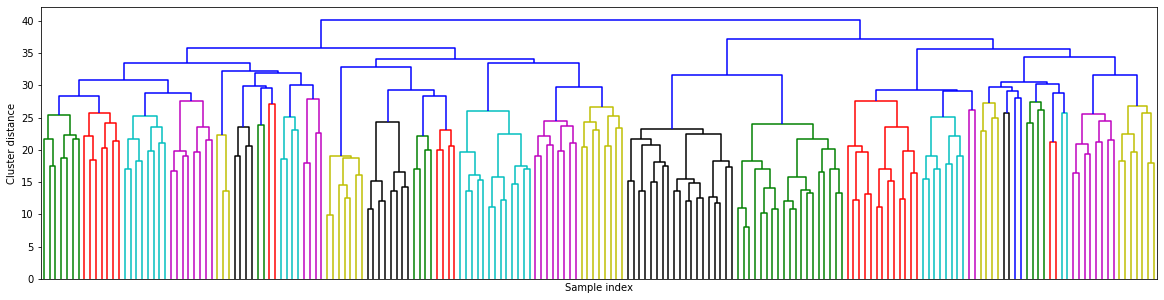

In [96]:
linkage_array = ward(X_pca)
# now we plot the dendrogram for the linkage_array
# containing the distances between clusters
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

- Creating ten clusters, we cut across the tree at the very top, where there are 10 vertical lines.

- In the dendrogram for the toy data shown in Figure dendrogram, you could see by the length of the branches that two or three clusters might capture the data appropriately.

- Here is a visualization of the ten clusters, similarly to k-Means above

- Note that there is no notion of cluster center in agglomerative clustering (though we could compute the mean), and we simply show the first couple of points in each cluster

- We show the number of points in each cluster to the left of the first image.

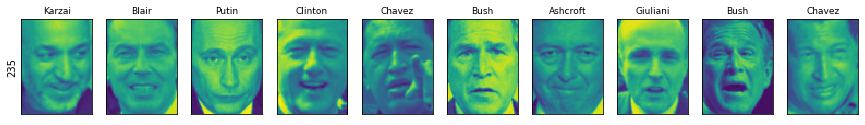

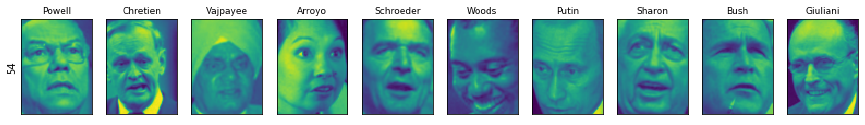

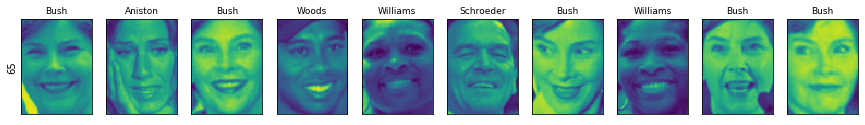

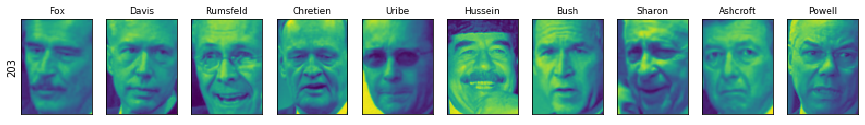

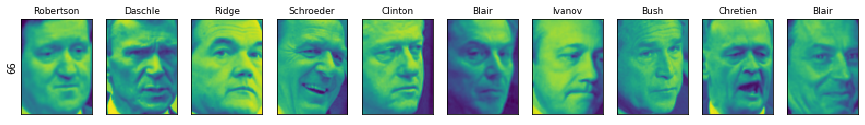

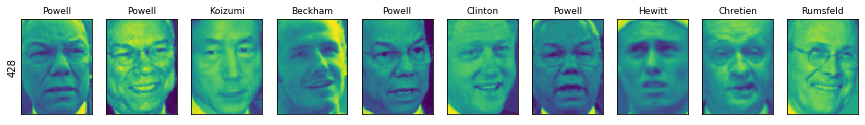

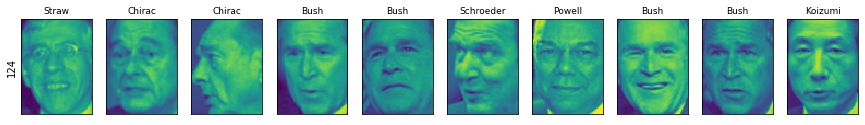

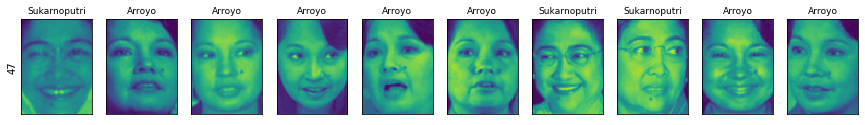

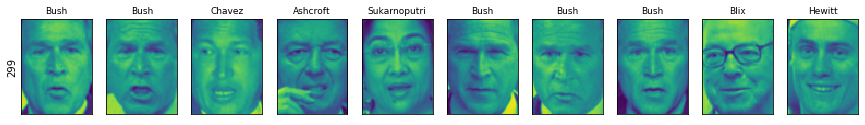

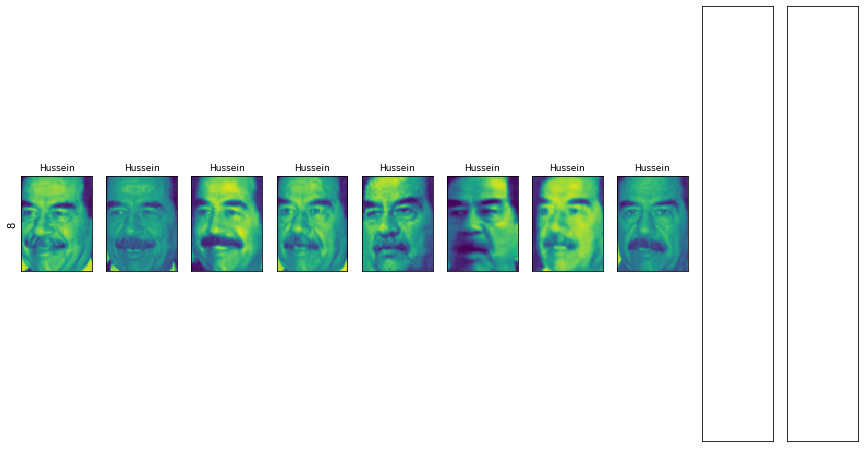

In [97]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})

 - While some of the clusters seem to have a semantic theme, many of them are too large to be actually homogeneous. To get more homogeneous cluster, we run the algorithm again, this time with 40 clusters, and pick out some of the clusters that are particularly interesting:

cluster sizes agglomerative clustering: [  2  91  12  47   5 178  55  38  30 163  23  36  68  37  30  76  49  41
  43   8  18   3  54  29   2  37  30   6  72  93   6   2  20  10  14  31
  28  12  27   3]


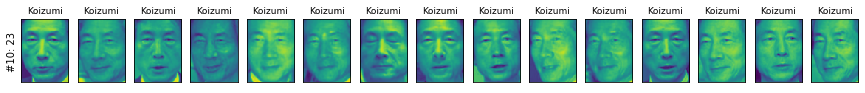

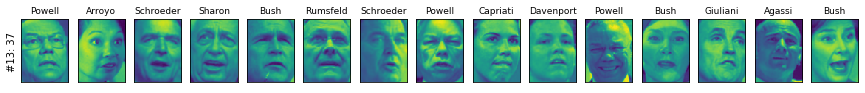

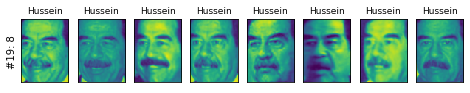

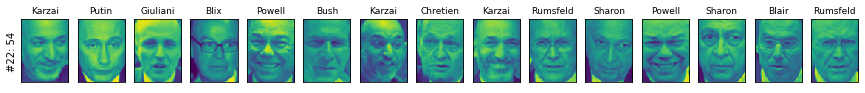

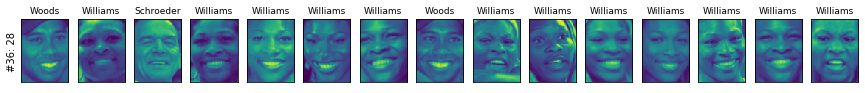

In [98]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

n_clusters = 40
for cluster in [10, 13, 19, 22, 36]: # hand-picked "interesting" clusters
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

cluster sizes agglomerative clustering: [ 31   5  48  13 100  32  39  25  12  18   3   2  17  34  23  36  19  36
  13   3  17   7  21  28   3  23   7   6  72  80  19  20   6  10  34  49
  21  24  22   8   1   4  13   5  19   1  23  27  29  11  17  40  24   5
  13   1  21   9   5  26  15  10  20  14   2   1  10  11   6   9  12   8
  21   4  13  42  25   4  19   3]


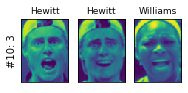

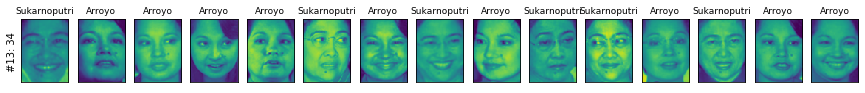

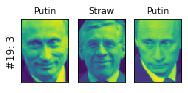

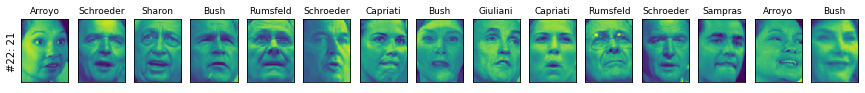

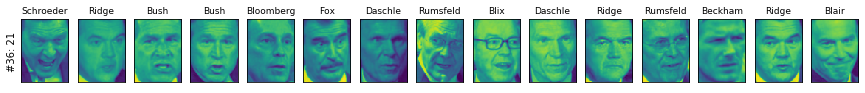

In [99]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=80)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

n_clusters = 80
for cluster in [10, 13, 19, 22, 36]: # hand-picked "interesting" clusters
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

# Summary of Clustering Methods

- We saw above that applying and evaluating clustering is a highly qualitative procedure, and often most helpful in the exploratory phase of data analysis.

- All three have a way of controlling the granularity of clustering. k-Means and Agglomerative Clustering allow you to directly specify the number of desired clusters, while DBSCAN lets you define proximity using the eps parameter, which indirectly influences cluster size. 

- Each of the algorithms has somewhat different strengths.

# Summary and Outlook

- This chapter introduced a range of unsupervised learning algorithms that can be applied for exploratory data analysis and preprocessing. Having the right representation of the data is often crucial for supervised or unsupervised learning to succeed, and preprocessing and decomposition methods play an important part in data preparation.